In [1]:
import readline
from rpy2.robjects.packages import importr, data
from rpy2.robjects import pandas2ri
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

/home/alex/applications/anaconda3[/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
pandas2ri.activate()

## Read in Data from R package

In [3]:
aer = importr('AER')
credcard = data(aer).fetch('CreditCard')

In [4]:
df = pandas2ri.ri2py(credcard['CreditCard'])

## Summmarize Data

In [5]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1,yes,0.0,37.66667,4.5200,0.033270,124.983300,yes,no,3.0,54.0,1.0,12.0
2,yes,0.0,33.25000,2.4200,0.005217,9.854167,no,no,3.0,34.0,1.0,13.0
3,yes,0.0,33.66667,4.5000,0.004156,15.000000,yes,no,4.0,58.0,1.0,5.0
4,yes,0.0,30.50000,2.5400,0.065214,137.869200,no,no,0.0,25.0,1.0,7.0
5,yes,0.0,32.16667,9.7867,0.067051,546.503300,yes,no,2.0,64.0,1.0,5.0


In [6]:
str_categories = ['card', 'owner', 'selfemp']
for cat in str_categories:
    df[cat] = df[cat].apply(lambda x: 1 if x == 'yes' or x == 1 else 0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1319 entries, 1 to 1319
Data columns (total 12 columns):
card           1319 non-null int64
reports        1319 non-null float64
age            1319 non-null float64
income         1319 non-null float64
share          1319 non-null float64
expenditure    1319 non-null float64
owner          1319 non-null int64
selfemp        1319 non-null int64
dependents     1319 non-null float64
months         1319 non-null float64
majorcards     1319 non-null float64
active         1319 non-null float64
dtypes: float64(9), int64(3)
memory usage: 134.0+ KB


In [8]:
df.describe()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.775588,0.456406,33.213103,3.365376,0.068732,185.057071,0.440485,0.068992,0.993935,55.267627,0.817286,6.996967
std,0.417353,1.345267,10.142783,1.693902,0.094656,272.218917,0.496634,0.253536,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,0.000000,0.000000,12.000000,1.000000,2.000000
50%,1.000000,0.000000,31.250000,2.900000,0.038827,101.298300,0.000000,0.000000,1.000000,30.000000,1.000000,6.000000
75%,1.000000,0.000000,39.416670,4.000000,0.093617,249.035800,1.000000,0.000000,2.000000,72.000000,1.000000,11.000000
max,1.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,1.000000,1.000000,6.000000,540.000000,1.000000,46.000000


### Age looks a little abnormal, low values don't appear to be correct

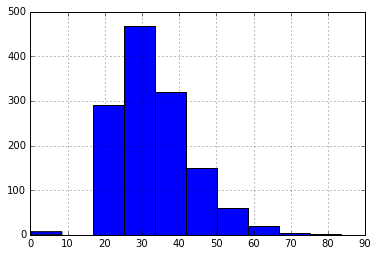

In [9]:
df['age'].hist()

In [10]:
df.loc[df['age'] <= 5]['age']

79      0.500000
324     0.166667
435     0.583333
462     0.750000
656     0.583333
659     0.500000
1195    0.750000
Name: age, dtype: float64

/home/alex/applications/anaconda3[/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


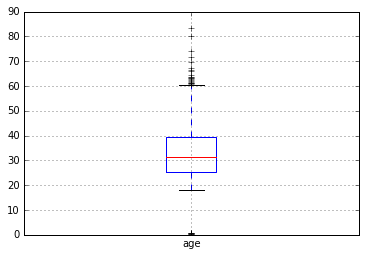

In [11]:
_ = df.boxplot('age')

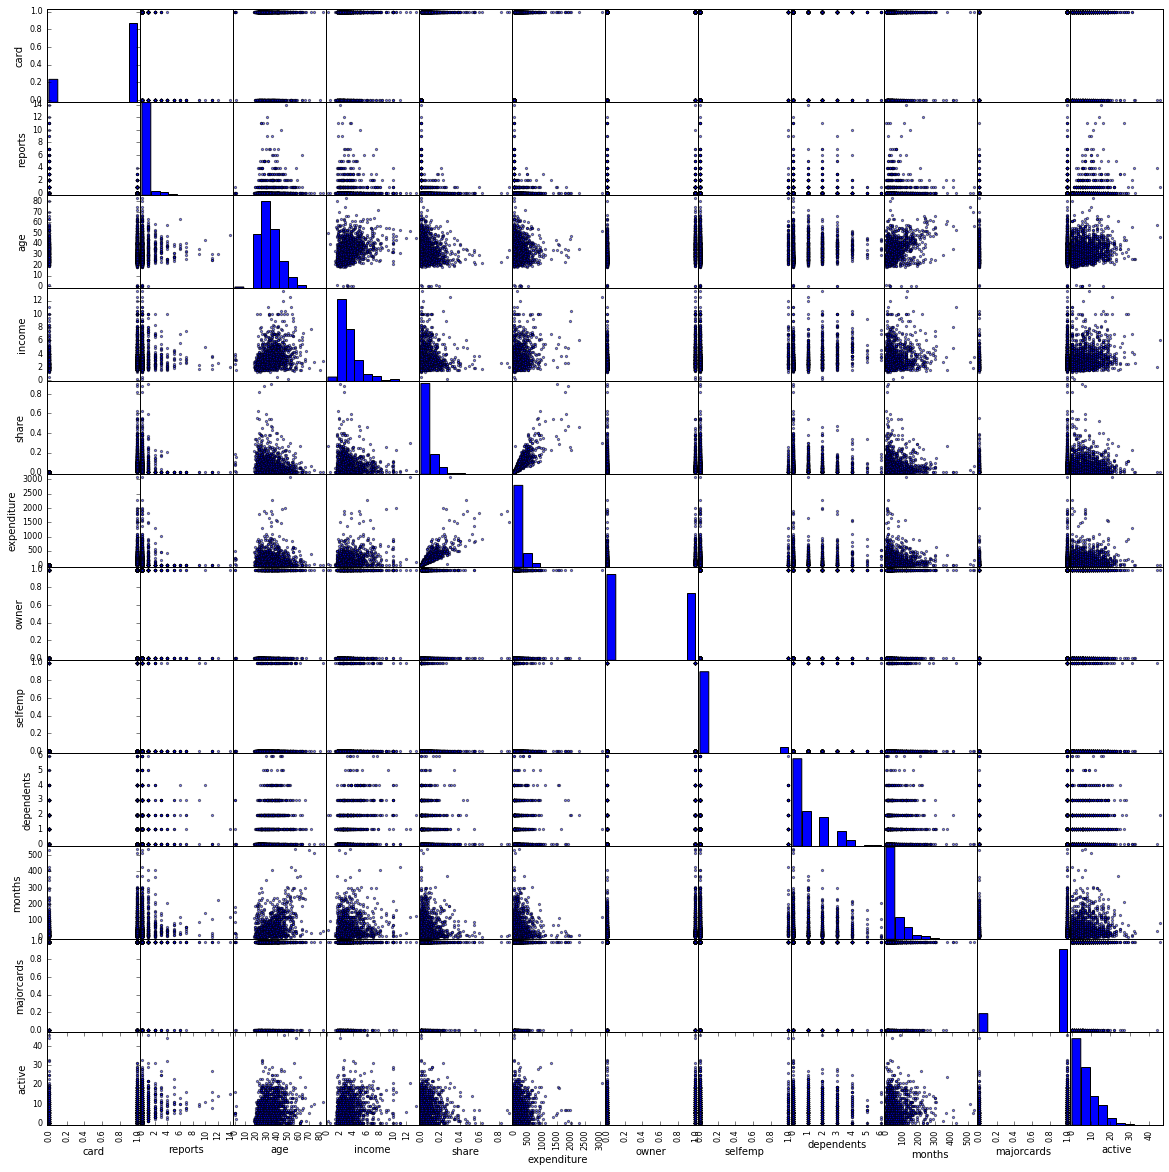

In [12]:
_ = pd.scatter_matrix(df, figsize=(20,20))

In [13]:
df.corr()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
card,1.000000,-0.452577,0.000537,0.094308,0.388028,0.365814,0.147826,-0.054340,-0.036126,-0.000268,0.107769,0.080464
reports,-0.452577,1.000000,0.044089,0.011023,-0.159011,-0.136538,-0.053570,0.018835,0.019731,0.048968,-0.007304,0.207755
age,0.000537,0.044089,1.000000,0.324653,-0.115697,0.014948,0.367749,0.100421,0.212146,0.436426,0.009777,0.181070
income,0.094308,0.011023,0.324653,1.000000,-0.054429,0.281104,0.324776,0.112294,0.317601,0.130346,0.107138,0.180540
share,0.388028,-0.159011,-0.115697,-0.054429,1.000000,0.838779,-0.015764,-0.078905,-0.082618,-0.055348,0.051470,-0.023474
expenditure,0.365814,-0.136538,0.014948,0.281104,0.838779,1.000000,0.093180,-0.035638,0.052664,-0.029007,0.077514,0.054724
owner,0.147826,-0.053570,0.367749,0.324776,-0.015764,0.093180,1.000000,0.041673,0.309190,0.238652,0.063851,0.274924
selfemp,-0.054340,0.018835,0.100421,0.112294,-0.078905,-0.035638,0.041673,1.000000,0.042096,0.065912,0.004854,0.029555
dependents,-0.036126,0.019731,0.212146,0.317601,-0.082618,0.052664,0.309190,0.042096,1.000000,0.046512,0.010285,0.107133
months,-0.000268,0.048968,0.436426,0.130346,-0.055348,-0.029007,0.238652,0.065912,0.046512,1.000000,-0.041447,0.100028


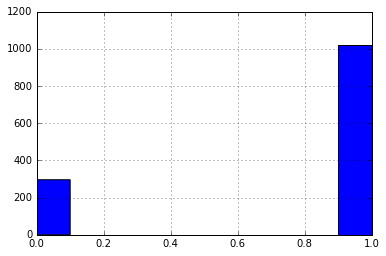

In [14]:
df['card'].hist()

In [15]:
df[df['card']==0].shape

(296, 12)

In [16]:
from sklearn import preprocessing

In [17]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
df_norm = pd.DataFrame(x_scaled)
df_norm.columns = df.columns

## 4 highest corr values
reports, share, expenditure, major_cards

In [18]:
import seaborn as sns

In [19]:
cols = ['reports', 'share', 'expenditure', 'majorcards', 'owner', 'card']

In [20]:
df_melt = pd.melt(df_norm[cols], id_vars='card')

In [21]:
df_melt.variable.unique()

array(['reports', 'share', 'expenditure', 'majorcards', 'owner'], dtype=object)

In [22]:
df_melt.head()


,card,variable,value
0,1.0,reports,0.0
1,1.0,reports,0.0
2,1.0,reports,0.0
3,1.0,reports,0.0
4,1.0,reports,0.0


In [23]:
df_norm[cols].head()

,reports,share,expenditure,majorcards,owner,card
0,0.0,0.036593,0.040324,1.0,1.0,1.0
1,0.0,0.005636,0.003179,1.0,0.0,1.0
2,0.0,0.004465,0.004839,1.0,1.0,1.0
3,0.0,0.071843,0.044481,1.0,0.0,1.0
4,0.0,0.073870,0.176320,1.0,1.0,1.0


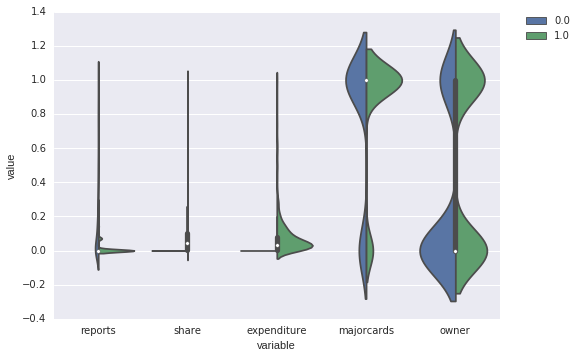

In [24]:
sns.violinplot(x='variable', y='value', hue='card', data=df_melt, split=True, width=0.8)
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [25]:
df['share'].unique()

array([ 0.03326991,  0.00521694,  0.00415556, ...,  0.02651261,
        0.00899892,  0.1116186 ])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6ce203190>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fc6ce1af290>], dtype=object)

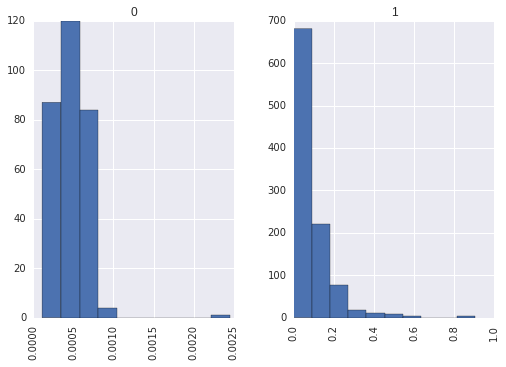

In [26]:
df.hist(column='share', by='card')

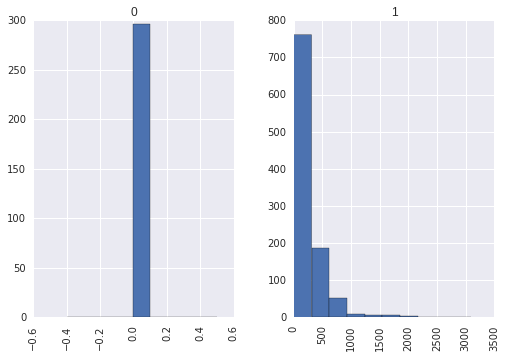

In [27]:
_ = df.hist(column='expenditure', by='card')

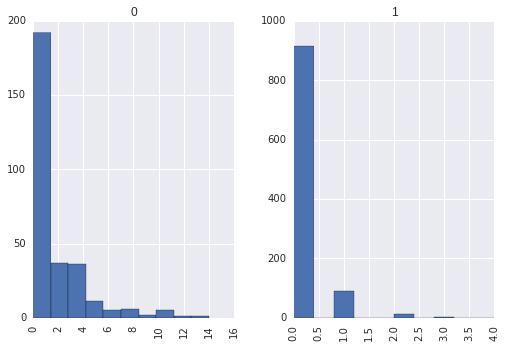

In [28]:
_ = df.hist(column='reports', by='card')

## Modeling

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.cross_validation import train_test_split

In [30]:
y = df.pop('card')
X = df

In [39]:
X.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1,0.0,37.66667,4.5200,0.033270,124.983300,1,0,3.0,54.0,1.0,12.0
2,0.0,33.25000,2.4200,0.005217,9.854167,0,0,3.0,34.0,1.0,13.0
3,0.0,33.66667,4.5000,0.004156,15.000000,1,0,4.0,58.0,1.0,5.0
4,0.0,30.50000,2.5400,0.065214,137.869200,0,0,0.0,25.0,1.0,7.0
5,0.0,32.16667,9.7867,0.067051,546.503300,1,0,2.0,64.0,1.0,5.0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scale Data

In [66]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = pd.DataFrame(min_max_scaler.transform(X_train))
X_test = pd.DataFrame(min_max_scaler.transform(X_test))
X_train.columns = X.columns
X_test.columns = X.columns

### Logistic Regression

In [67]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.83838383838383834

In [68]:
zip(X.columns, model.coef_[0])

[('reports', -5.8540774813438849),
 ('age', -0.3371681964314725),
 ('income', 0.82358478815895531),
 ('share', 6.2563425753941999),
 ('expenditure', 4.6865537161164434),
 ('owner', 0.53942619114916524),
 ('selfemp', -0.19165937961433793),
 ('dependents', -0.66953677068892881),
 ('months', 0.21290570787083879),
 ('majorcards', 0.37464257787853783),
 ('active', 1.5639358839790249)]

### Random Forest

In [69]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.97979797979797978

In [70]:
zip(X.columns, model.feature_importances_)

[('reports', 0.004247080635673724),
 ('age', 0.019600171699307424),
 ('income', 0.01841119044543936),
 ('share', 0.42352120107825764),
 ('expenditure', 0.49722924267321134),
 ('owner', 0.0061176447434030719),
 ('selfemp', 0.00026040355037623301),
 ('dependents', 0.0033640743974119856),
 ('months', 0.016359609137713935),
 ('majorcards', 0.0035101904543156093),
 ('active', 0.0073791911848896776)]

### K-Nearest Neighbors

In [71]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.85101010101010099

### Experiement with multiple models

In [72]:
test_models = {
                'rfc': RandomForestClassifier(),
                'knn': KNeighborsClassifier(),
                'logit': LogisticRegression()
                }

average score for rfc is 0.977272727273
average score for knn is 0.85101010101
average score for logit is 0.838383838384


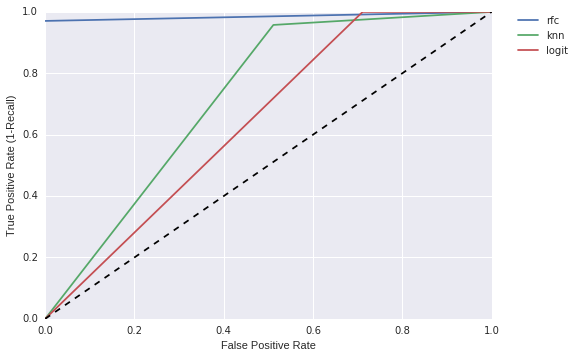

In [73]:
for mod_name, model in test_models.iteritems():
    model.fit(X_train, y_train)
    mod_score = model.score(X_test, y_test)
    print "average score for %s is %s" % (mod_name, mod_score)
    fpr, trp, _ = roc_curve(y_test.values, model.predict(X_test))
    plt.plot(fpr, trp, label=mod_name)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (1-Recall)')
plt.plot([0,1],[0,1], ls="--", color='black')

plt.show()

In [74]:
logit_coefs = zip(X.columns, test_models['logit'].coef_[0])

In [ ]:
logit_coefs

In [ ]:
ypos = np.arange(len(logit_coefs))
plt.barh(ypos, test_models['logit'].coef_[0])
plt.yticks(ypos, X.columns)
plt.grid(b=None)
plt.title('Coefficients of Logistic Regression')
plt.ylabel('Features')
plt.xlabel('Coefficients')

### Run on Entire dataset

In [ ]:
final_model = LogisticRegression()
final_model.fit(X,y)


## Persist Model

In [ ]:
joblib.dump(final_model, 'logit_model.pkl', compress=1)